# Plot InSAR data

## Tools

*Modules*

In [1]:
import numpy as np
import geopandas as gpd
from astropy.time import Time

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.cm as cmx
import matplotlib.ticker as ti
from matplotlib import patheffects
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmcrameri.cm as cmc
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cf
import pygmt
import pyproj
from pygmt.datasets import load_earth_relief
from fontTools.ttLib import TTFont
from matplotlib.font_manager import fontManager, FontProperties

In [2]:
plt.style.use('myfig.mplstyle')

*Paths*

In [3]:
# paths
wkdir = "/Users/emile/Documents/Etude/2024_2025_M2/tutored_project"
datadir = "{:}/data".format(wkdir)
plotdir = "{:}/figures".format(wkdir)

*Dead Sea shapefile*

In [4]:
crs_geo = 'EPSG:4326'
crs_utm = 'EPSG:32636'

In [5]:
dead_sea_shp_geo = gpd.read_file("{:}/Dead_sea_shapefile/dead_sea.shp".format(datadir))
dead_sea_shp_utm = dead_sea_shp_geo.to_crs(crs_utm)

In [6]:
x_dead_sea, y_dead_sea = dead_sea_shp_utm.geometry[0].exterior.xy
x_dead_sea = np.array(x_dead_sea)
y_dead_sea = np.array(y_dead_sea)

*Load InSAR*

In [7]:
# InSAR time periods
insar_asc_tinf = '2015-03-04'
insar_asc_tsup = '2021-04-25'

insar_desc_tinf = '2014-10-31'
insar_desc_tsup = '2021-04-27'

insar_asc_tinf_yr = Time(insar_asc_tinf).decimalyear
insar_asc_tsup_yr = Time(insar_asc_tsup).decimalyear

insar_desc_tinf_yr = Time(insar_desc_tinf).decimalyear
insar_desc_tsup_yr = Time(insar_desc_tsup).decimalyear

insar_asc_period_yr = insar_asc_tsup_yr - insar_asc_tinf_yr
insar_desc_period_yr = insar_desc_tsup_yr - insar_desc_tinf_yr

In [8]:
insar_asc_vel = 10 * np.load("{:}/InSAR_FLATSIM/numpy_format/insar_asc_vel.npy".format(datadir))
insar_asc_mask_nodata = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_asc_mask_nodata.npy".format(datadir))

insar_asc_lon = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_asc_lon.npy".format(datadir))
insar_asc_lat = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_asc_lat.npy".format(datadir))

insar_asc_x = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_asc_x_utm.npy".format(datadir))
insar_asc_y = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_asc_y_utm.npy".format(datadir))

insar_asc_LOS = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_asc_LOS.npy".format(datadir))
insar_asc_LOS_mean = np.mean(insar_asc_LOS, axis=(0, 1))

insar_asc_nbinterf = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_asc_nbinterf.npy".format(datadir))
insar_asc_misclosure = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_asc_misclosure.npy".format(datadir))
insar_asc_coherence = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_asc_coherence.npy".format(datadir))

In [9]:
insar_asc_vel[insar_asc_mask_nodata] = np.nan
insar_asc_nbinterf[insar_asc_mask_nodata] = np.nan
insar_asc_misclosure[insar_asc_mask_nodata] = np.nan
insar_asc_coherence[insar_asc_mask_nodata] = np.nan

In [10]:
insar_desc_vel = 10 * np.load("{:}/InSAR_FLATSIM/numpy_format/insar_desc_vel.npy".format(datadir))
insar_desc_mask_nodata = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_desc_mask_nodata.npy".format(datadir))

insar_desc_lon = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_desc_lon.npy".format(datadir))
insar_desc_lat = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_desc_lat.npy".format(datadir))

insar_desc_x = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_desc_x_utm.npy".format(datadir))
insar_desc_y = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_desc_y_utm.npy".format(datadir))

insar_desc_LOS = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_desc_LOS.npy".format(datadir))
insar_desc_LOS_mean = np.mean(insar_desc_LOS, axis=(0, 1))

insar_desc_nbinterf = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_desc_nbinterf.npy".format(datadir))
insar_desc_misclosure = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_desc_misclosure.npy".format(datadir))
insar_desc_coherence = np.load("{:}/InSAR_FLATSIM/numpy_format/insar_desc_coherence.npy".format(datadir))

In [11]:
insar_desc_vel[insar_desc_mask_nodata] = np.nan
insar_desc_nbinterf[insar_desc_mask_nodata] = np.nan
insar_desc_misclosure[insar_desc_mask_nodata] = np.nan
insar_desc_coherence[insar_desc_mask_nodata] = np.nan

In [12]:
threshold_nbinterf = 1000.
threshold_rms = .8

In [13]:
insar_asc_vel[insar_asc_nbinterf <= threshold_nbinterf] = np.nan
insar_asc_vel[insar_asc_misclosure >= threshold_rms] = np.nan

In [14]:
insar_desc_vel[insar_desc_nbinterf <= threshold_nbinterf] = np.nan
insar_desc_vel[insar_desc_misclosure >= threshold_rms] = np.nan

*Functions*

In [15]:
def found_font_with_unicode_char(list_unichars):
    
    def char_in_font(unicode_char, font):
        if font.endswith('.ttc'):
            fontNo = 0
        else:
            fontNo = -1
        font = TTFont(font, fontNumber=fontNo)
        for cmap in font['cmap'].tables: 
            if cmap.isUnicode():
                for i in unicode_char:
                    if ord(i) not in cmap.cmap:
                        return False
        return True

    font_list = [(f.fname, f.name) for f in fontManager.ttflist]
    for font in font_list:
        if char_in_font(list_unichars, font[0]):
            return FontProperties(fname=font[0])
    
    return None


def draw_scalebar(ax, length, location=(.9, .9), linewidth=3, units='km', m_per_unit=1000):    
    """
    http://stackoverflow.com/a/35705477/1072212
    ax is the axes to draw the scalebar on.
    proj is the projection the axes are in
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    units is the name of the unit
    m_per_unit is the number of meters in a unit
    """
    
    def utm_from_lon(lon):
        """
        utm_from_lon - UTM zone for a longitude
        Not right for some polar regions (Norway, Svalbard, Antartica)
        :param float lon: longitude
        :return: UTM zone number
        :rtype: int
        """
        return int(np.floor((lon+180)/6)+1)
    
    proj = ax.projection
    # find lat/lon center to find best UTM zone
    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
    # Projection in metres
    utm = ccrs.UTM(utm_from_lon((x0+x1)/2))
    # Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    # Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    # Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * m_per_unit/2, sbcx + length * m_per_unit/2]
    # buffer for scalebar
    buffer = [patheffects.withStroke(linewidth=5, foreground="w")]
    # Plot the scalebar with buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
            linewidth=linewidth, path_effects=buffer)
    # Plot the scalebar label
    ax.text(sbcx, sbcy+(y1 - y0)*0.01, '{:} {:}'.format(length, units), transform=utm,
            ha='center', va='bottom', path_effects=buffer, zorder=2)
    return


def draw_north_arrow(ax, location=(.1, .9)):    
    """
    http://stackoverflow.com/a/35705477/1072212
    ax is the axes to draw the scalebar on.
    proj is the projection the axes are in
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    units is the name of the unit
    m_per_unit is the number of meters in a unit
    """
    
    def utm_from_lon(lon):
        """
        utm_from_lon - UTM zone for a longitude
        Not right for some polar regions (Norway, Svalbard, Antartica)
        :param float lon: longitude
        :return: UTM zone number
        :rtype: int
        """
        return int(np.floor((lon+180)/6)+1)
    
    proj = ax.projection
    # find lat/lon center to find best UTM zone
    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
    utm = ccrs.UTM(utm_from_lon((x0+x1)/2))
    x0, x1, y0, y1 = ax.get_extent(utm)
    # Turn the arow location into coordinates in metres
    sbcx = x0 + (x1 - x0) * location[0]
    sbcy = y0 + (y1 - y0) * location[1]
    # buffer and plot
    buffer = [patheffects.withStroke(linewidth=3, foreground="w")]
    ax.text(sbcx, sbcy, u'\u25B2\nN', fontproperties=found_font_with_unicode_char([u"\u25B2"]),
            transform=utm, ha='center', va='bottom', path_effects=buffer)
    return

## Plot InSAR data

*Plot statistics*

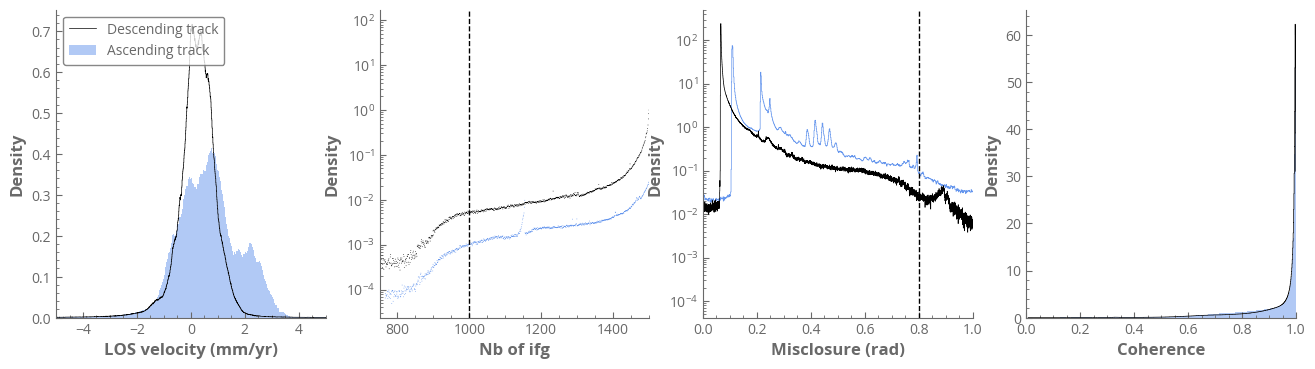

In [75]:
fig, ax = plt.subplots(ncols=4, figsize=(16, 4))

sns.histplot(insar_asc_vel.flatten(), ax=ax[0], edgecolor=None, color='cornflowerblue', alpha=.5, label='Ascending track', stat='density')
sns.histplot(insar_desc_vel.flatten(), ax=ax[0], color='k', fill=False, element="step", lw=.5, label='Descending track', stat='density')
ax[0].set_xlim(-5, 5)
ax[0].set_xlabel('LOS velocity (mm/yr)')
ax[0].legend(loc='upper left')

sns.histplot(insar_asc_nbinterf.flatten(), ax=ax[1], color='cornflowerblue', fill=False, element="step", lw=.5, stat='density', log_scale=(False, True))
sns.histplot(insar_desc_nbinterf.flatten(), ax=ax[1], color='k', fill=False, element="step", lw=.5, stat='density', log_scale=(False, True))
ax[1].axvline(threshold_nbinterf, ls='--', c='k', lw=1)
ax[1].set_xlim(750, 1500)
ax[1].set_xlabel('Nb of ifg')

sns.histplot(insar_asc_misclosure.flatten(), ax=ax[2], color='cornflowerblue', fill=False, element="step", lw=.5, stat='density', log_scale=(False, True))
sns.histplot(insar_desc_misclosure.flatten(), ax=ax[2], color='k', fill=False, element="step", lw=.5, stat='density', log_scale=(False, True))
ax[2].axvline(threshold_rms, ls='--', c='k', lw=1)
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('Misclosure (rad)')

sns.histplot(insar_asc_coherence.flatten(), ax=ax[3], edgecolor=None, color='cornflowerblue', alpha=.5, stat='density')
sns.histplot(insar_desc_coherence.flatten(), ax=ax[3], color='k', fill=False, element="step", lw=.5, stat='density')
ax[3].set_xlim(0, 1)
ax[3].set_xlabel('Coherence')

fig.savefig("{:}/insar_data_pdf.png".format(plotdir), dpi=300, bbox_inches='tight')
plt.show()

*Plot maps*

In [76]:
region = [33.5, 38, 28, 35.5]

In [77]:
# topography
relief = load_earth_relief(resolution="01m", registration="gridline", region=region)
land_grad = pygmt.grdgradient(grid=relief, azimuth=255, normalize='e0.4')

/Users/emile/anaconda3/envs/pygdal/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: GEOGCRS["unknown",DATUM["Unknown based on WGS 84 e ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/Users/emile/anaconda3/envs/pygdal/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: GEOGCRS["unknown",DATUM["Unknown based on WGS 84 e ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warni

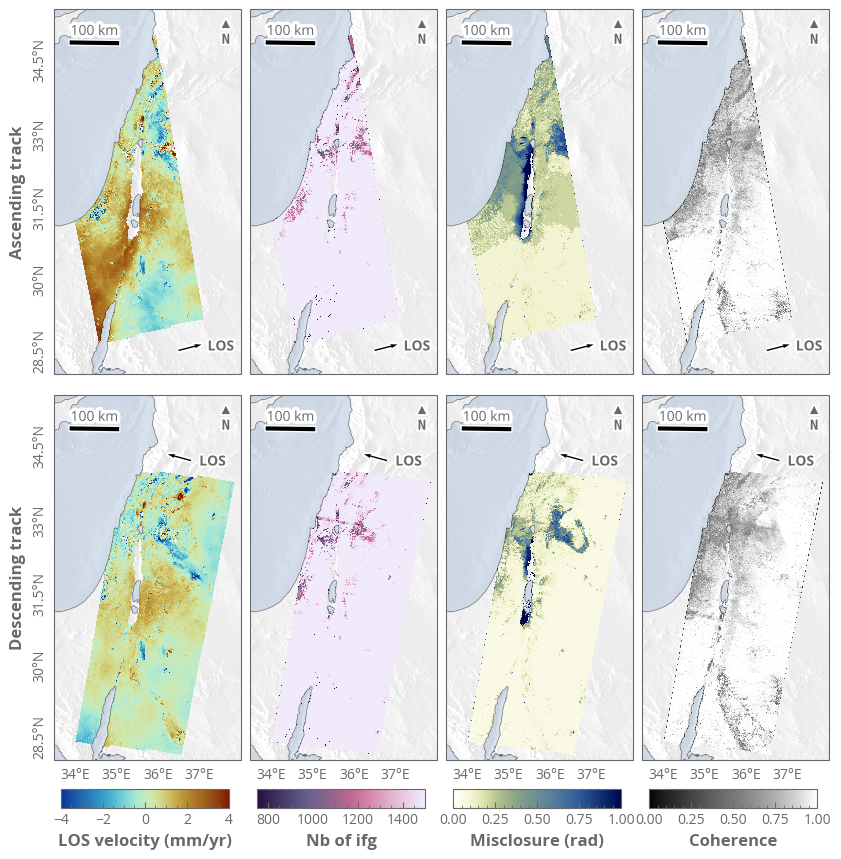

In [78]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(10, 10), sharex=True, sharey=True, subplot_kw={'projection': ccrs.Mercator()})

# Nice map

for i in range(2):
    for j in range(4):

        ax[i, j].set_extent(region)
        ax[i, j].pcolormesh(relief.lon, relief.lat, land_grad, cmap=cmc.grayC, transform=ccrs.PlateCarree(), alpha=.1, zorder=-1)
        ax[i, j].add_feature(cf.OCEAN, facecolor='lightsteelblue', alpha=.5)
        ax[i, j].add_feature(cf.LAKES, facecolor='lightsteelblue', lw=.5, edgecolor='k', alpha=.5)
        ax[i, j].add_feature(cf.COASTLINE, lw=.5, edgecolor='k', alpha=.5)
        
        draw_scalebar(ax[i, j], length=100, location=(.2, .9))
        draw_north_arrow(ax[i, j], location=(.85, .9))
        
        if j == 0:
            gl = ax[i, j].gridlines(draw_labels=True, crs=ccrs.PlateCarree())
            gl.top_labels = False
            gl.bottom_labels = False
            gl.right_labels = False
            gl.xlines = False
            gl.ylines = False
            gl.xlocator = ti.MaxNLocator(5)
            gl.ylocator = ti.MaxNLocator(5)
            gl.ylabel_style = {'rotation': 90}
        
        if i == 1:
            gl = ax[i, j].gridlines(draw_labels=True, crs=ccrs.PlateCarree())
            gl.top_labels = False
            gl.right_labels = False
            gl.left_labels = False
            gl.xlines = False
            gl.ylines = False
            gl.xlocator = ti.MaxNLocator(5)
            gl.ylocator = ti.MaxNLocator(5)
            gl.ylabel_style = {'rotation': 90}

# LOS vector

for j in range(4):
    ax[0, j].quiver(np.array([36.5]), np.array([28.5]), np.array([insar_asc_LOS_mean[0]]), np.array([insar_asc_LOS_mean[1]]),
                    transform=ccrs.PlateCarree(), clip_on=False, angles='uv', scale=3, path_effects=[patheffects.withStroke(linewidth=3, foreground="w")])
    ax[0, j].text(37.2, 28.5, 'LOS', transform=ccrs.PlateCarree(), fontweight='bold', path_effects=[patheffects.withStroke(linewidth=3, foreground="w")])
    
    ax[1, j].quiver(np.array([36.8]), np.array([34.2]), np.array([insar_desc_LOS_mean[0]]), np.array([insar_desc_LOS_mean[1]]),
                    transform=ccrs.PlateCarree(), clip_on=False, angles='uv', scale=3, path_effects=[patheffects.withStroke(linewidth=3, foreground="w")])
    ax[1, j].text(37, 34.1, 'LOS', transform=ccrs.PlateCarree(), fontweight='bold', path_effects=[patheffects.withStroke(linewidth=3, foreground="w")])

# LOS velocity

cmap = cmc.roma_r
norm = mcolors.Normalize(vmin=-4, vmax=4)
mappable = cmx.ScalarMappable(norm=norm, cmap=cmap)

ax[0, 0].pcolormesh(insar_asc_lon, insar_asc_lat, insar_asc_vel, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
ax[1, 0].pcolormesh(insar_desc_lon, insar_desc_lat, insar_desc_vel, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

cax = inset_axes(ax[1, 0], width="90%", height="5%", loc="lower left",
                  bbox_to_anchor=(0, -.15, 1, 1), bbox_transform=ax[1, 0].transAxes)
cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb.set_label('LOS velocity (mm/yr)')

# Nb interferogram

cmap = cmc.acton
norm = mcolors.Normalize(vmin=750, vmax=1500)
mappable = cmx.ScalarMappable(norm=norm, cmap=cmap)

ax[0, 1].pcolormesh(insar_asc_lon, insar_asc_lat, insar_asc_nbinterf, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
ax[1, 1].pcolormesh(insar_desc_lon, insar_desc_lat, insar_desc_nbinterf, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

cax = inset_axes(ax[1, 1], width="90%", height="5%", loc="lower left",
                  bbox_to_anchor=(0, -.15, 1, 1), bbox_transform=ax[1, 1].transAxes)
cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb.set_label('Nb of ifg')

# Misclosure

cmap = cmc.davos_r
norm = mcolors.Normalize(vmin=0, vmax=1)
mappable = cmx.ScalarMappable(norm=norm, cmap=cmap)

ax[0, 2].pcolormesh(insar_asc_lon, insar_asc_lat, insar_asc_misclosure, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
ax[1, 2].pcolormesh(insar_desc_lon, insar_desc_lat, insar_desc_misclosure, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

cax = inset_axes(ax[1, 2], width="90%", height="5%", loc="lower left",
                  bbox_to_anchor=(0, -.15, 1, 1), bbox_transform=ax[1, 2].transAxes)
cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb.set_label('Misclosure (rad)')

# Temporal coherence

cmap = cmc.grayC
norm = mcolors.Normalize(vmin=0, vmax=1)
mappable = cmx.ScalarMappable(norm=norm, cmap=cmap)

ax[0, 3].pcolormesh(insar_asc_lon, insar_asc_lat, insar_asc_coherence, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
ax[1, 3].pcolormesh(insar_desc_lon, insar_desc_lat, insar_desc_coherence, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

cax = inset_axes(ax[1, 3], width="90%", height="5%", loc="lower left",
                  bbox_to_anchor=(0, -.15, 1, 1), bbox_transform=ax[1, 3].transAxes)
cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb.set_label('Coherence')

ax[0, 0].text(-0.15, 0.5, 'Ascending track', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax[0, 0].transAxes, fontweight='bold', fontsize=12)

ax[1, 0].text(-0.15, 0.5, 'Descending track', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax[1, 0].transAxes, fontweight='bold', fontsize=12)

plt.subplots_adjust(wspace=.05, hspace=.005)
fig.savefig("{:}/insar_data_map.png".format(plotdir), dpi=300, bbox_inches='tight')
plt.show()